### Controlling the line properties of a chart

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tools.rplot as rplot

ModuleNotFoundError: No module named 'pandas.tools.rplot'

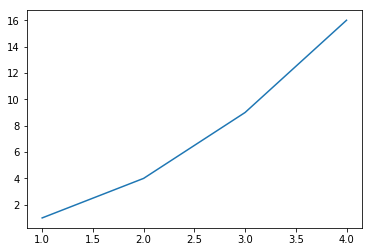

In [8]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

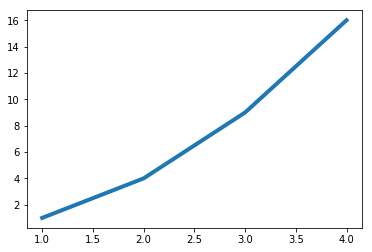

In [11]:
# line width
plt.plot([1,2,3,4],[1,4,9,16], linewidth=4)
plt.show()

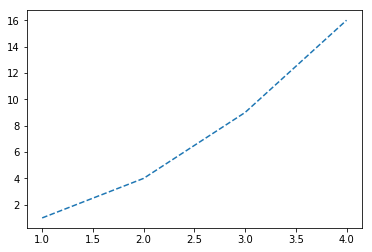

In [15]:
# dashed line
line, = plt.plot([1,2,3,4],[1,4,9,16])
line.set_linestyle('--')

[None, None]

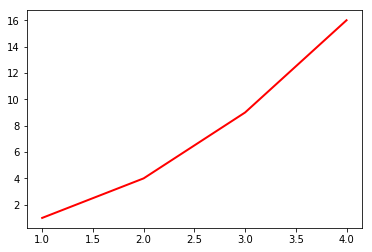

In [17]:
#Set multiple properties
line, = plt.plot([1,2,3,4],[1,4,9,16])
plt.setp(line, color='r', linewidth=2)

### Creating multiple plots

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


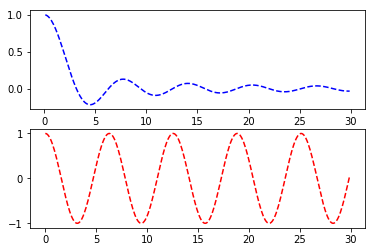

In [25]:
pl = np.arange(0,30, 0.1)
plt.subplot(211)
plt.plot(pl, np.sin(pl)/pl, 'b--')

plt.subplot(212)
plt.plot(pl, np.cos(pl), 'r--')
plt.show()

### Playing with text

In [41]:
n = np.random.random_sample((5,))
n

array([0.73664013, 0.81570551, 0.08658601, 0.52948047, 0.59223679])

In [42]:
m = np.arange(len(n))
m

array([0, 1, 2, 3, 4])

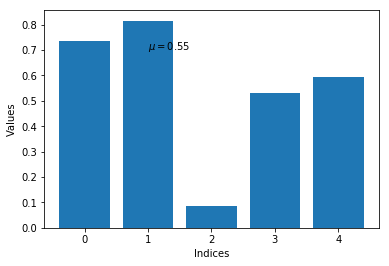

In [43]:
plt.bar(m, n)
plt.xlabel('Indices')
plt.ylabel('Values')
plt.text(1, .7, r'$\mu=' + str(np.round(np.mean(n), 2)) + ' $')
plt.show()

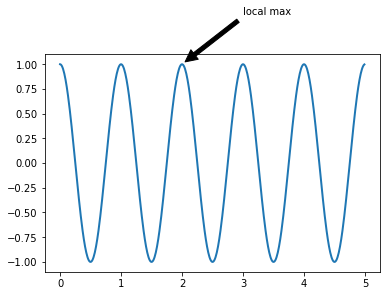

In [45]:
# Annotation
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate('local max', xy=(2,1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05), )
plt.show()

### Styling your plots

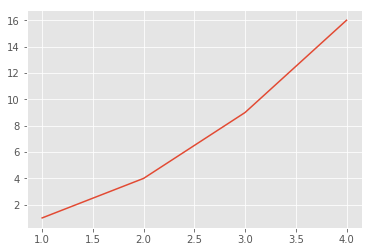

In [47]:
# the famous ggplot style of the R language 
plt.style.use('ggplot')
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

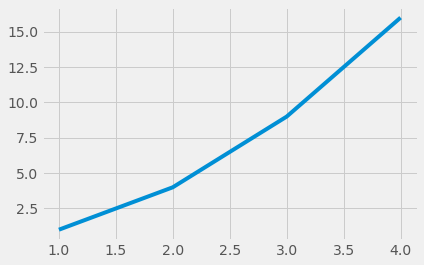

In [48]:
# the Nate Silver website fivethirtyeight style
plt.style.use('fivethirtyeight')
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

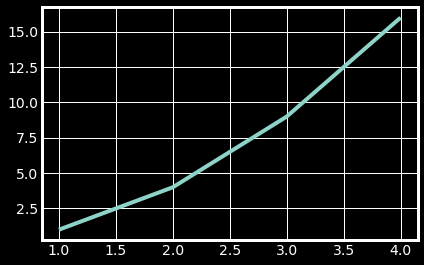

In [53]:
# Dark background
with plt.style.context(('dark_background')):
    plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

### Box plots

In [95]:
# creating some data
np.random.seed(10)
box_data_1 = np.random.normal(100, 20, 200) # array of 200 elements
box_data_2 = np.random.normal(80, 30, 200)
box_data_3 = np.random.normal(90, 20, 200)

In [96]:
# Combining the different data in a list
data_to_plot = [box_data_1, box_data_2, box_data_3]

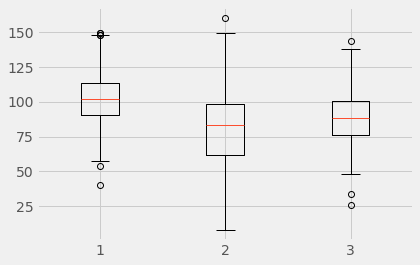

In [117]:
# create the boxplot
bp = plt.boxplot(data_to_plot)

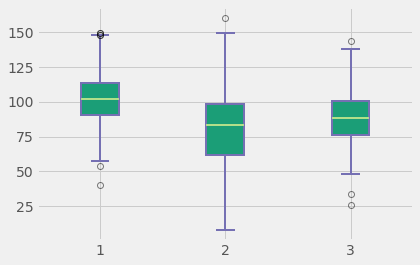

In [118]:
bp=plt.boxplot(data_to_plot, patch_artist=True)

#change outline color, fill color and line width of boxes
for box in bp['boxes']:
    box.set(color='#7570b3', linewidth=2) # outline color
    box.set(facecolor='#1b9e77') #fill color
    
# change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
# change the style of fliers and thier fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

### Heatmaps
    A heatmap is a graphical representation where individual values of a matrix are represented as colors
    A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix
    This helps in finding patterns and gives a perspective of depth

In [131]:
# Generate data
data = np.random.rand(10, 6) # two dimension array with 10 rows and 6 columns
rows = list('ZYXWVUTSRQ') #Ylabel
columns = list('ABCDEF') # Xlabel

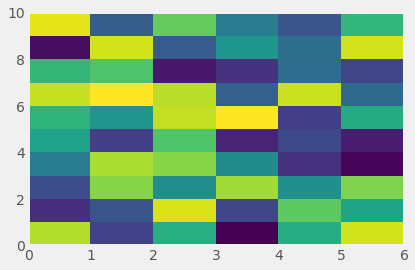

In [132]:
#basic heat map plot
plt.pcolor(data)
plt.show()

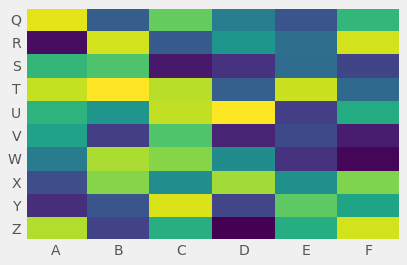

In [133]:
# Add row and column labels
plt.pcolor(data)
plt.xticks(np.arange(0,6)+0.5, columns)
plt.yticks(np.arange(0,10)+0.5, rows)
plt.show()

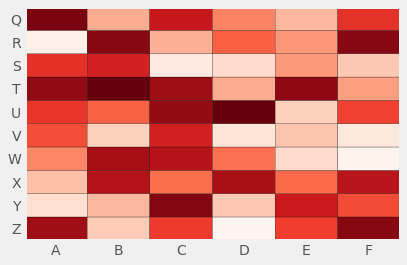

In [134]:
# Change color map
plt.pcolor(data, cmap=plt.cm.Reds, edgecolors='k')
plt.xticks(np.arange(0,6)+0.5, columns)
plt.yticks(np.arange(0,10)+0.5, rows)
plt.show()

In [135]:
# In some instances, there might be a huge number of values that need to be plotted on the heatmap
# generate some test data
x = np.random.randn(8873)
y = np.random.randn(8873)

In [136]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

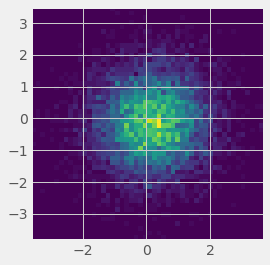

In [137]:
plt.imshow(heatmap, extent=extent)
plt.show()

### Scatter plot with histogram

In [156]:
from matplotlib.ticker import NullFormatter
x = np.random.randn(1000)
y = np.random.randn(1000)
nullfmt = NullFormatter() # used for eliminating the x and y labels of the histograms

In [157]:
# definition for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

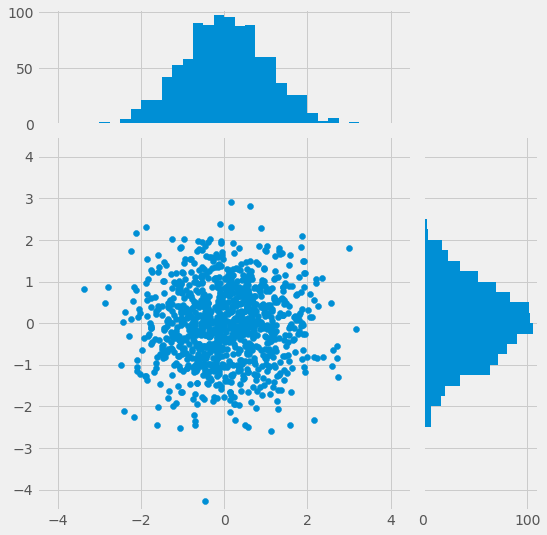

In [160]:
# Start with a rectangular figure
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

#no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

#scatter plot
axScatter.scatter(x, y)

#Now determine nice limits by hand
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)

axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

### Scatter plot matrix

In [162]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a','b','c','d'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


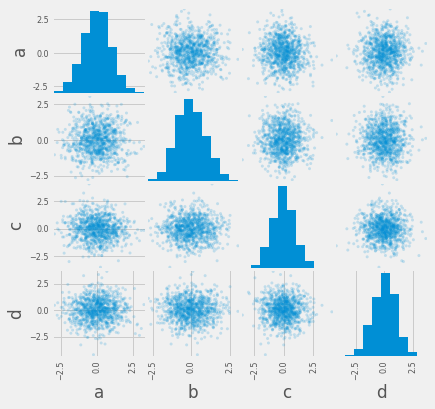

In [163]:
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='hist')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


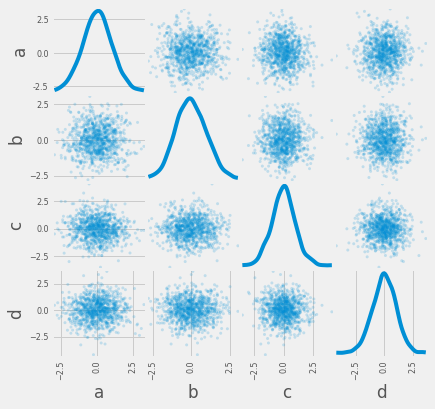

In [164]:
# instead of the histogram, use kernel density estimation for the diagonal
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')

### Area plots
An area plot is useful for comparing the values of different factors across a range

In [173]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['p','q','r','s'])

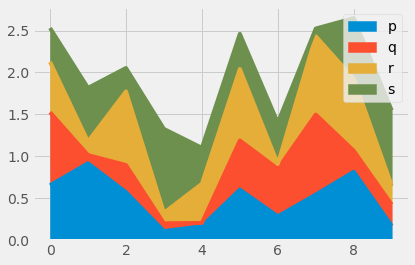

In [174]:
df.plot(kind='area')

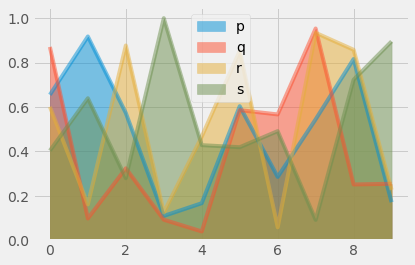

In [175]:
# To remove the stack of area plot
df.plot(kind='area', stacked=False)

### Bubble charts
A bubble chart is basically a scatter plot with an additional dimension

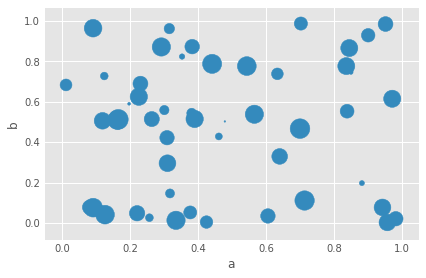

In [177]:
plt.style.use('ggplot')
df = pd.DataFrame(np.random.rand(50, 3), columns=['a','b','c'])
df.plot(kind='scatter', x='a', y='b',s=df['c']*400) # s is the size of the bubble:

### Hexagon bin plots
This kind of plot is really useful if your scatter plot is too dense to interpret

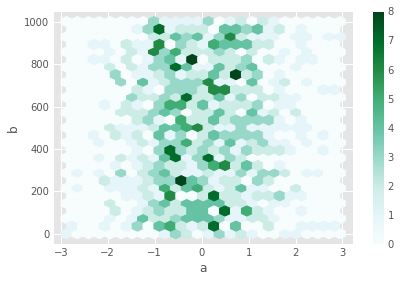

In [178]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a','b'])
df['b'] = df['b'] + np.arange(1000)
df.plot(kind='hexbin', x='a', y='b', gridsize=25)

### Trellis plots
A Trellis plot is a layout of smaller charts in a grid with consistent scales

In [180]:
# plotting a trellis chart where for each combination of sex and smoker/nonsmoker
tips_data = pd.read_csv('data/tips.csv')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [182]:
tips_data.shape

(244, 7)